In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# reading Dataset
retail= pd.read_csv("Online Retail.csv", sep=",", encoding="ISO-8859-1")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# parse date
# We are using infer datatime_format =True parse the date data, this 

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail.shape

(541909, 8)

In [7]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Na Handling
retail.isnull().values.any()

True

In [9]:

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# to see whether to drop or impute values

retail.isnull().sum()*100/retail.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
order_wise =retail.dropna()

In [12]:
# Sanity check

order_wise.shape
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
amount=pd.DataFrame(order_wise.Quantity * order_wise.UnitPrice, columns=["Amount"])

In [14]:
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [15]:
# merging amount in order_wise

order_wise= pd.concat(objs= [order_wise,amount], axis=1, ignore_index= False)

In [16]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
# Monetary Function

monetary =order_wise.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()

In [18]:
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
# frequency function

frequency = order_wise[['CustomerID','InvoiceNo']]

In [24]:
frequency.head()

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365


In [25]:
k= frequency.groupby('CustomerID').InvoiceNo.count()
k=pd.DataFrame(k)
k=k.reset_index()
k.columns = ["CustomerID","Frequency"]
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
master = monetary.merge(k, on="CustomerID", how="inner")
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [27]:
# Generating recency function
recency = order_wise[["CustomerID","InvoiceDate"]]

In [28]:
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-01-12 08:26:00
1,17850.0,2010-01-12 08:26:00
2,17850.0,2010-01-12 08:26:00
3,17850.0,2010-01-12 08:26:00
4,17850.0,2010-01-12 08:26:00


In [29]:
maximum= max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff']= maximum -recency.InvoiceDate
recency.head()

C:\Users\Sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,InvoiceDate,diff
0,17850.0,2010-01-12 08:26:00,698 days 08:53:00
1,17850.0,2010-01-12 08:26:00,698 days 08:53:00
2,17850.0,2010-01-12 08:26:00,698 days 08:53:00
3,17850.0,2010-01-12 08:26:00,698 days 08:53:00
4,17850.0,2010-01-12 08:26:00,698 days 08:53:00


In [30]:
# DataFrame merging by recency
df= pd.DataFrame(recency.groupby("CustomerID").diff.min())
df= df.reset_index()
df.columns= ["CustomerID", "Recency"]
df.head()

,CustomerID,Recency
0,12346.0,327 days 07:02:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


In [31]:
# Combining all recency frequency and monetary paramters

RFM = k.merge(monetary, on="CustomerID")
RFM= RFM.merge(df, on="CustomerID")
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
1,12347.0,182,4310.00,41 days 04:54:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00


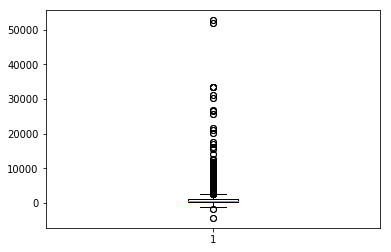

In [35]:
# Outlier treatment for Amount

plt.boxplot(data=RFM, x="Amount")
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount
# Outlier treatment for Amount

plt.boxplot(data=RFM, x="Amount")
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM =RFM[(RFM.Amount >=Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]
IQR = Q3 - Q1
RFM =RFM[(RFM.Amount >=Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

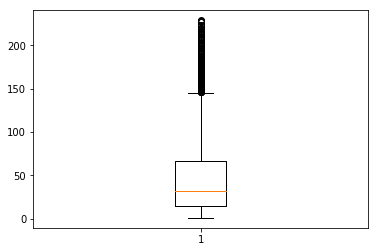

In [36]:
# Outlier treatment for Frequency

plt.boxplot(data=RFM, x="Frequency")
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM =RFM[(RFM.Frequency >=Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

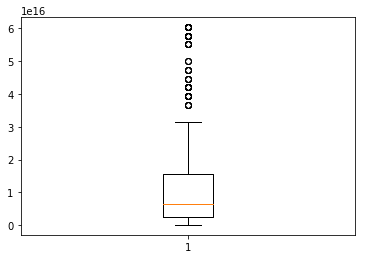

In [37]:
# Outlier treatment for Recency

plt.boxplot(data=RFM, x="Recency")
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM =RFM[(RFM.Recency >=Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

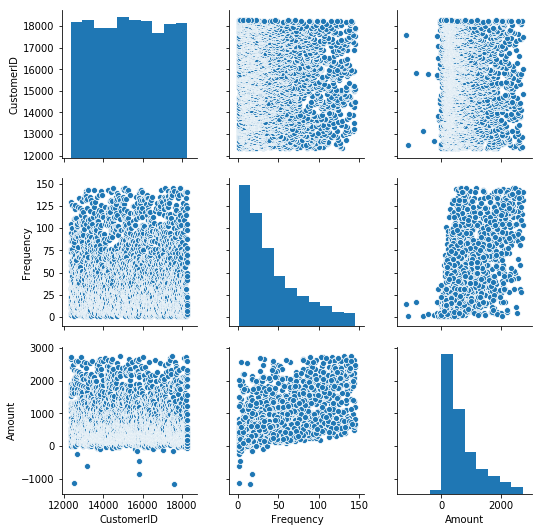

In [38]:
sns.pairplot(RFM)

In [39]:
# standardise all parameters
RFM_normal = RFM.drop("CustomerID", axis=1)
RFM_normal.Recency = RFM_normal.Recency.dt.days

In [40]:
RFM_normal.Recency.head()

0    327
2     77
3     20
4    312
5     74
Name: Recency, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
standard_scalar.fit_transform(RFM_normal)

C:\Users\Sachin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sachin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.13143819, -1.14028248,  2.27436031],
       [-0.30799327,  1.8408033 , -0.31653454],
       [ 0.88458213,  1.77496941, -0.90725857],
       ...,
       [-0.98946493, -1.00622618, -1.06271226],
       [-0.81909702, -0.84735569, -0.14035369],
       [ 0.79939817,  1.90721773, -1.10416658]])

In [42]:
# sum of squared distances
ssd=[]
for num_clusters in list(range(1,21)):
    model_clus =KMeans(n_clusters=num_clusters, max_iter=1000)
    model_clus.fit(RFM_normal)
    ssd.append(model_clus.inertia_)

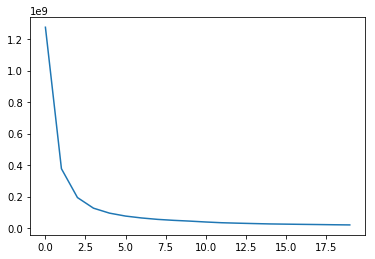

In [43]:
plt.plot(ssd)

In [55]:
mod5=KMeans(n_clusters=5, max_iter=1000, tol=0.01)
mod5.fit(RFM_normal)
ssd.append(mod5.inertia_)

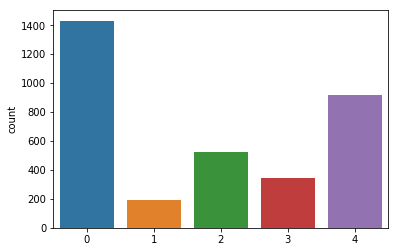

In [56]:
sns.countplot(mod5.labels_)

In [57]:
# Analysis of clusters formed

RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(mod5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency= RFM.Recency.dt.days
km_clusters_amount=pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency=pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency=pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [58]:
RFM.columns

Index(['CustomerID', 'Frequency', 'Amount', 'Recency'], dtype='object')

In [59]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount,
               km_clusters_frequency,km_clusters_recency], axis=1)
df.columns = ["ClusterID","Amount_mean", "Frequency_mean","Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,209.546904,19.803634,146.171209
1,1,2282.199794,95.360825,56.025773
2,2,1019.845717,57.799235,70.732314
3,3,1593.070872,77.860465,57.151163
4,4,566.552719,42.316249,98.059978


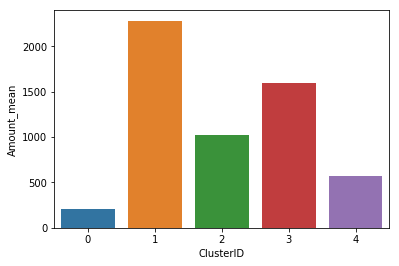

In [60]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

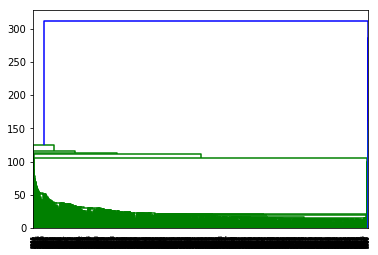

In [62]:
# hierarchial clustering 

merging = linkage(RFM_normal, method= 'single' , metric="euclidean")
dendrogram(merging)
plt.show()

In [66]:
clusterCut = pd.Series(cut_tree(merging, n_clusters=5).reshape(-1,))
RFM_hc =pd.concat([RFM, clusterCut], axis=1)
RFM_hc.columns=['CustomerID','Frequency','Amount','Recency','ClusterID']

In [67]:
# summarize

RFM_hc.Recency= RFM.Recency.dt.days
hc_clusters_amount=pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Amount.mean())
hc_clusters_frequency=pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
hc_clusters_recency=pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [68]:
df = pd.concat([pd.Series([0,1,2,3,4]), hc_clusters_amount,
               hc_clusters_frequency,hc_clusters_recency], axis=1)
df.columns = ["ClusterID","Amount_mean", "Frequency_mean","Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,689.696902,41.897474,107.487368
1,1,-1145.650000,8.000000,122.000000
2,2,-611.860000,1.000000,146.000000
3,3,-451.420000,3.000000,144.000000
4,4,-840.760000,17.000000,193.000000


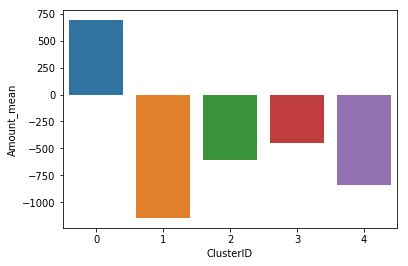

In [69]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)